<a href="https://colab.research.google.com/github/rrr2911/TFM/blob/main/Trabajo_Final_Fase3_Renato_Rosito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIME no disponible. Instalando...
ANÁLISIS COMPARATIVO DE TÉCNICAS DE IA PARA CLASIFICACIÓN DE INTRUSIONES
Problema: Clasificación Multiclase Supervisada
Dataset: NSL-KDD (5 clases: Normal, DoS, Probe, R2L, U2R)
Autor: Renato Rafael Rosito Pullin
Universidad InterNaciones - Máster en Inteligencia Artificial
Descargando NSL-KDD dataset para clasificación...
   Dataset de clasificación cargado exitosamente:
   Entrenamiento: 125973 muestras etiquetadas
   Prueba: 22544 muestras etiquetadas
   Total: 148517 muestras para clasificación
   Características: 41 (sin label y difficulty)
EXPLORACIÓN DE DATOS - CLASIFICACIÓN MULTICLASE NSL-KDD

INFORMACIÓN GENERAL DEL DATASET DE CLASIFICACIÓN:
   Forma del dataset: (148517, 43)
   Valores nulos: 0

DISTRIBUCIÓN DE CLASES PARA CLASIFICACIÓN MULTICLASE:
clase_clasificacion
Normal    77054
DoS       55418
Probe     12762
R2L        3194
U2R          89
Name: count, dtype: int64


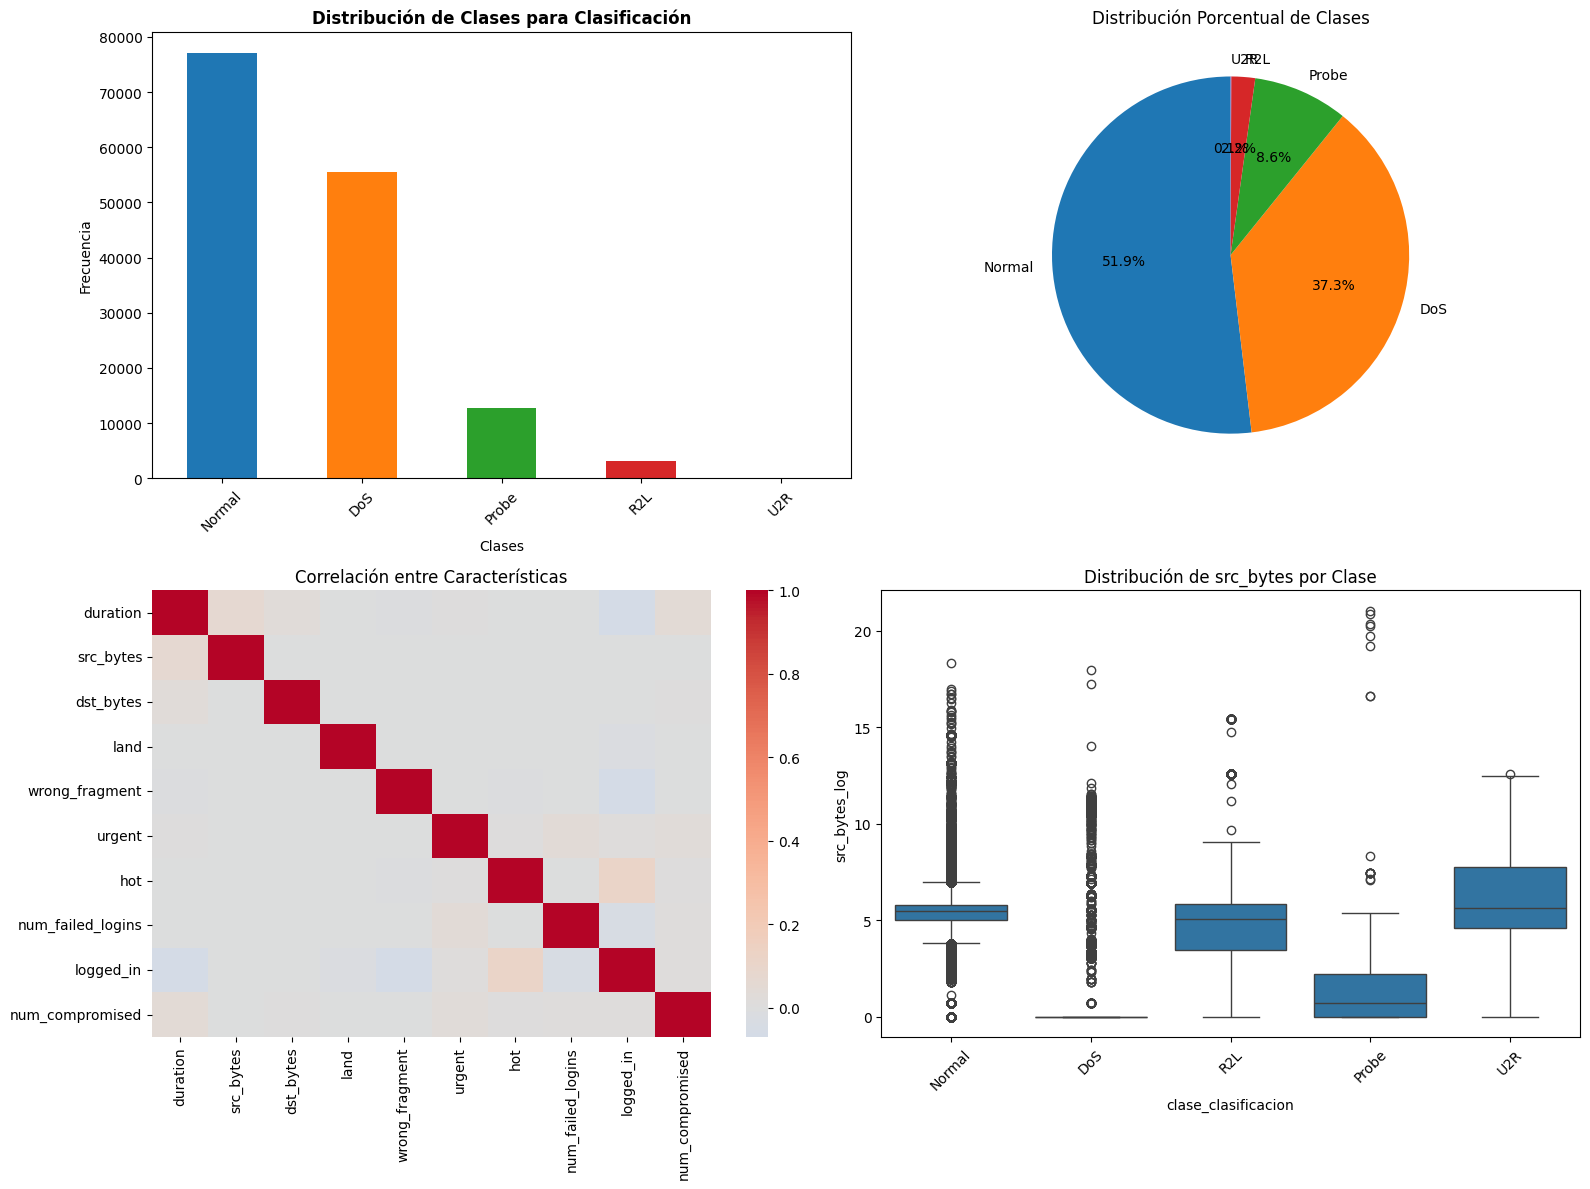


ESTADÍSTICAS POR CLASE:
   Normal: 77054 muestras (51.88%)
   DoS: 55418 muestras (37.31%)
   Probe: 12762 muestras (8.59%)
   R2L: 3194 muestras (2.15%)
   U2R: 89 muestras (0.06%)

ANÁLISIS DE DESBALANCE:
   Ratio de desbalance: 865.78:1
   Clase mayoritaria: Normal (77054 muestras)
   Clase minoritaria: U2R (89 muestras)
PREPROCESAMIENTO PARA CLASIFICACIÓN MULTICLASE
Datos para clasificación: 148517 muestras, 42 características
Clases objetivo: ['DoS', 'Normal', 'Probe', 'R2L', 'U2R']
Clases codificadas: {'DoS': 0, 'Normal': 1, 'Probe': 2, 'R2L': 3, 'U2R': 4}
Distribución de clases codificadas: [55418 77054 12762  3194    89]
Preprocesamiento para clasificación completado:
   Muestras: 148517
   Características: 42
   Clases para clasificación: 5

División de datos para clasificación:
   Entrenamiento: 118813 muestras etiquetadas
   Prueba: 29704 muestras etiquetadas
   Características: 42
   Clases: 5 (DoS, Normal, Probe, R2L, U2R)

ENTRENAMIENTO DE CLASIFICADORES ML TRADICIONALES

In [ ]:
# ============================================================================
# ANÁLISIS COMPARATIVO DE TÉCNICAS DE IA PARA CLASIFICACIÓN DE INTRUSIONES
# Dataset: NSL-KDD - Problema de Clasificación Multiclase Supervisada
# Autor: Renato Rafael Rosito Pullin
# TFG - Máster en Inteligencia Artificial - Universidad InterNaciones
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, classification_report, confusion_matrix)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import shap
try:
    import lime
    from lime import lime_tabular
    LIME_AVAILABLE = True
except ImportError:
    LIME_AVAILABLE = False
    print("LIME no disponible. Instalando...")

warnings.filterwarnings('ignore')

# CONFIGURACIÓN Y CONSTANTES PARA CLASIFICACIÓN

# URLs de descarga NSL-KDD
NSL_KDD_URLS = {
    'train': 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTrain%2B.txt',
    'test': 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/KDDTest%2B.txt'
}

# Nombres de columnas NSL-KDD
COLUMN_NAMES = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty'
]

# Mapeo de clases para clasificación multiclase
CLASES_NSL_KDD = ['Normal', 'DoS', 'Probe', 'R2L', 'U2R']

# FUNCIONES DE CARGA Y PREPROCESAMIENTO PARA CLASIFICACIÓN

def cargar_nsl_kdd():
    """Carga el dataset NSL-KDD para clasificación multiclase"""
    print("Descargando NSL-KDD dataset para clasificación...")

    try:
        # Cargar datos de entrenamiento
        train_df = pd.read_csv(NSL_KDD_URLS['train'], names=COLUMN_NAMES)
        test_df = pd.read_csv(NSL_KDD_URLS['test'], names=COLUMN_NAMES)

        # Combinar para análisis unificado
        df_completo = pd.concat([train_df, test_df], ignore_index=True)

        print(f"   Dataset de clasificación cargado exitosamente:")
        print(f"   Entrenamiento: {len(train_df)} muestras etiquetadas")
        print(f"   Prueba: {len(test_df)} muestras etiquetadas")
        print(f"   Total: {len(df_completo)} muestras para clasificación")
        print(f"   Características: {len(COLUMN_NAMES)-2} (sin label y difficulty)")

        return df_completo, train_df, test_df

    except Exception as e:
        print(f"Error cargando NSL-KDD: {e}")
        return None, None, None

def mapear_clases_nsl_kdd(labels):
    """Mapea las etiquetas detalladas a las 5 clases principales de clasificación"""
    clases_mapeadas = []

    for label in labels:
        if label == 'normal':
            clases_mapeadas.append('Normal')
        elif label in ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']:
            clases_mapeadas.append('DoS')
        elif label in ['ipsweep', 'nmap', 'portsweep', 'satan']:
            clases_mapeadas.append('Probe')
        elif label in ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster']:
            clases_mapeadas.append('R2L')
        elif label in ['buffer_overflow', 'loadmodule', 'perl', 'rootkit']:
            clases_mapeadas.append('U2R')
        else:
            # Para ataques no vistos, clasificar como el tipo más similar
            clases_mapeadas.append('DoS')  # Clasificación por defecto

    return clases_mapeadas

def explorar_datos_clasificacion(df):
    """Análisis exploratorio específico para problema de clasificación multiclase"""

    print("EXPLORACIÓN DE DATOS - CLASIFICACIÓN MULTICLASE NSL-KDD")

    print(f"\nINFORMACIÓN GENERAL DEL DATASET DE CLASIFICACIÓN:")
    print(f"   Forma del dataset: {df.shape}")
    print(f"   Valores nulos: {df.isnull().sum().sum()}")

    # Mapear a 5 clases principales
    labels_originales = df['label'].str.lower().str.strip()
    clases_mapeadas = mapear_clases_nsl_kdd(labels_originales)
    df['clase_clasificacion'] = clases_mapeadas

    # Distribución de clases para clasificación
    print(f"\nDISTRIBUCIÓN DE CLASES PARA CLASIFICACIÓN MULTICLASE:")
    distribucion = df['clase_clasificacion'].value_counts()
    print(distribucion)

    # Visualización de distribución de clases
    plt.figure(figsize=(16, 12))

    # Gráfico de barras
    plt.subplot(2, 2, 1)
    distribucion.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
    plt.title('Distribución de Clases para Clasificación', fontsize=12, fontweight='bold')
    plt.xlabel('Clases')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    # Gráfico circular
    plt.subplot(2, 2, 2)
    plt.pie(distribucion.values, labels=distribucion.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución Porcentual de Clases')

    # Matriz de correlación de características principales
    plt.subplot(2, 2, 3)
    features_num = df.select_dtypes(include=[np.number]).columns[:10]
    correlation_matrix = df[features_num].corr()
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlación entre Características')

    # Boxplot para detectar outliers
    plt.subplot(2, 2, 4)
    df['src_bytes_log'] = np.log1p(df['src_bytes'])
    sns.boxplot(data=df, x='clase_clasificacion', y='src_bytes_log')
    plt.title('Distribución de src_bytes por Clase')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Estadísticas por clase
    print(f"\nESTADÍSTICAS POR CLASE:")
    porcentajes = (distribucion / len(df) * 100).round(2)
    for clase, cantidad in distribucion.items():
        porcentaje = porcentajes[clase]
        print(f"   {clase}: {cantidad} muestras ({porcentaje}%)")

    # Identificar desbalance de clases
    ratio_desbalance = distribucion.max() / distribucion.min()
    print(f"\nANÁLISIS DE DESBALANCE:")
    print(f"   Ratio de desbalance: {ratio_desbalance:.2f}:1")
    print(f"   Clase mayoritaria: {distribucion.idxmax()} ({distribucion.max()} muestras)")
    print(f"   Clase minoritaria: {distribucion.idxmin()} ({distribucion.min()} muestras)")

    return df

def preprocesar_nsl_kdd_clasificacion(df):
    """Preprocesamiento específico para clasificación multiclase NSL-KDD"""

    print("PREPROCESAMIENTO PARA CLASIFICACIÓN MULTICLASE")

    # Crear copia
    df_procesado = df.copy()

    # Eliminar columna difficulty
    if 'difficulty' in df_procesado.columns:
        df_procesado = df_procesado.drop('difficulty', axis=1)

    # Usar las clases mapeadas si existen, sino mapear
    if 'clase_clasificacion' not in df_procesado.columns:
        labels_originales = df_procesado['label'].str.lower().str.strip()
        df_procesado['clase_clasificacion'] = mapear_clases_nsl_kdd(labels_originales)

    # Separar características y etiquetas de clasificación
    X = df_procesado.drop(['label', 'clase_clasificacion'], axis=1)
    y_clasificacion = df_procesado['clase_clasificacion']

    print(f"Datos para clasificación: {len(df_procesado)} muestras, {X.shape[1]} características")
    print(f"Clases objetivo: {sorted(y_clasificacion.unique())}")

    # Identificar columnas categóricas
    categorical_cols = ['protocol_type', 'service', 'flag']

    # Codificar variables categóricas
    label_encoders = {}
    for col in categorical_cols:
        if col in X.columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            label_encoders[col] = le

    # Codificar etiquetas objetivo para clasificación multiclase
    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(y_clasificacion)

    print(f"Clases codificadas: {dict(zip(le_target.classes_, range(len(le_target.classes_))))}")
    print(f"Distribución de clases codificadas: {np.bincount(y_encoded)}")

    # Normalizar características para clasificadores
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f"Preprocesamiento para clasificación completado:")
    print(f"   Muestras: {X_scaled.shape[0]}")
    print(f"   Características: {X_scaled.shape[1]}")
    print(f"   Clases para clasificación: {len(np.unique(y_encoded))}")

    return X_scaled, y_encoded, scaler, le_target, label_encoders

# IMPLEMENTACIÓN DE CLASIFICADORES

def entrenar_clasificadores_ml(X_train, X_test, y_train, y_test, nombres_clases):
    """Entrenamiento de clasificadores de Machine Learning tradicional"""

    print("ENTRENAMIENTO DE CLASIFICADORES ML TRADICIONALES")

    # Definir clasificadores
    clasificadores = {
        'Random Forest': RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            n_jobs=-1,
            max_depth=20
        ),
        'SVM': SVC(
            kernel='linear',
            random_state=42,
            probability=True,
            gamma='scale'
            #max_iter=1000,  # Límite de iteraciones
            #tol=1e-3,       # Tolerancia menos estricta
            #C=1.0           # Regularización estándar
        ),
        'KNN': KNeighborsClassifier(
            n_neighbors=5,
            n_jobs=-1,
            weights='distance'
        )
    }

    resultados_clasificadores = {}

    for nombre, clasificador in clasificadores.items():
        print(f"\nEntrenando clasificador {nombre}...")

        # Medir tiempo de entrenamiento
        inicio = time.time()
        clasificador.fit(X_train, y_train)
        tiempo_entrenamiento = time.time() - inicio

        # Medir tiempo de clasificación
        inicio = time.time()
        y_pred = clasificador.predict(X_test)
        tiempo_clasificacion = time.time() - inicio

        # Calcular métricas de clasificación
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Métricas por clase individual
        precision_por_clase = precision_score(y_test, y_pred, average=None, zero_division=0)
        recall_por_clase = recall_score(y_test, y_pred, average=None, zero_division=0)
        f1_por_clase = f1_score(y_test, y_pred, average=None, zero_division=0)

        # Matriz de confusión para clasificación multiclase
        matriz_confusion = confusion_matrix(y_test, y_pred)

        # Almacenar resultados del clasificador
        resultados_clasificadores[nombre] = {
            'clasificador': clasificador,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'precision_por_clase': precision_por_clase,
            'recall_por_clase': recall_por_clase,
            'f1_por_clase': f1_por_clase,
            'matriz_confusion': matriz_confusion,
            'tiempo_entrenamiento': tiempo_entrenamiento,
            'tiempo_clasificacion': tiempo_clasificacion,
            'y_pred': y_pred
        }

        # Mostrar resultados de clasificación
        print(f"   Métricas de Clasificación:")
        print(f"     Accuracy: {accuracy:.4f}")
        print(f"     Precision (weighted): {precision:.4f}")
        print(f"     Recall (weighted): {recall:.4f}")
        print(f"     F1-Score (weighted): {f1:.4f}")
        print(f"   Tiempos:")
        print(f"     Entrenamiento: {tiempo_entrenamiento:.2f}s")
        print(f"     Clasificación: {tiempo_clasificacion:.4f}s")

        # Mostrar métricas por clase
        print(f"   Métricas por Clase:")
        for i, clase in enumerate(nombres_clases):
            print(f"     {clase}: P={precision_por_clase[i]:.3f}, R={recall_por_clase[i]:.3f}, F1={f1_por_clase[i]:.3f}")

    return resultados_clasificadores

def crear_clasificador_dnn(input_dim, num_classes):
    """Clasificador DNN para clasificación multiclase"""
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')  # Softmax para clasificación multiclase
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',  # Para clasificación multiclase
        metrics=['accuracy']
    )

    return model

def crear_clasificador_cnn(input_dim, num_classes):
    """Clasificador CNN para clasificación multiclase"""
    model = Sequential([
        tf.keras.layers.Reshape((input_dim, 1)),
        Conv1D(32, 3, activation='relu'),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')  # Softmax para clasificación multiclase
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def crear_clasificador_lstm(input_dim, num_classes):
    """Clasificador LSTM para clasificación secuencial multiclase"""
    model = Sequential([
        tf.keras.layers.Reshape((input_dim, 1)),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')  # Softmax para clasificación multiclase
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def entrenar_clasificadores_dl(X_train, X_test, y_train, y_test, nombres_clases):
    """Entrenamiento de clasificadores de Deep Learning"""

    print("ENTRENAMIENTO DE CLASIFICADORES DEEP LEARNING")

    num_classes = len(np.unique(y_train))
    input_dim = X_train.shape[1]

    # Definir clasificadores DL
    clasificadores_dl = {
        'DNN': crear_clasificador_dnn(input_dim, num_classes),
        'CNN': crear_clasificador_cnn(input_dim, num_classes),
        'LSTM': crear_clasificador_lstm(input_dim, num_classes)
    }

    resultados_clasificadores_dl = {}

    for nombre, clasificador in clasificadores_dl.items():
        print(f"\nEntrenando clasificador {nombre}...")

        # Callbacks
        early_stopping = EarlyStopping(
            patience=10,
            restore_best_weights=True,
            monitor='val_loss'
        )

        # Medir tiempo de entrenamiento
        inicio = time.time()
        historia = clasificador.fit(
            X_train, y_train,
            epochs=20,
            batch_size=64,
            validation_split=0.1,
            verbose=0,
            callbacks=[early_stopping]
        )
        tiempo_entrenamiento = time.time() - inicio

        # Medir tiempo de clasificación
        inicio = time.time()
        y_pred_proba = clasificador.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred_proba, axis=1)
        tiempo_clasificacion = time.time() - inicio

        # Calcular métricas de clasificación
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Métricas por clase
        precision_por_clase = precision_score(y_test, y_pred, average=None, zero_division=0)
        recall_por_clase = recall_score(y_test, y_pred, average=None, zero_division=0)
        f1_por_clase = f1_score(y_test, y_pred, average=None, zero_division=0)

        # Matriz de confusión
        matriz_confusion = confusion_matrix(y_test, y_pred)

        # Almacenar resultados
        resultados_clasificadores_dl[nombre] = {
            'clasificador': clasificador,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'precision_por_clase': precision_por_clase,
            'recall_por_clase': recall_por_clase,
            'f1_por_clase': f1_por_clase,
            'matriz_confusion': matriz_confusion,
            'tiempo_entrenamiento': tiempo_entrenamiento,
            'tiempo_clasificacion': tiempo_clasificacion,
            'y_pred': y_pred,
            'historia': historia
        }

        # Mostrar resultados
        print(f"   Métricas de Clasificación:")
        print(f"     Accuracy: {accuracy:.4f}")
        print(f"     Precision (weighted): {precision:.4f}")
        print(f"     Recall (weighted): {recall:.4f}")
        print(f"     F1-Score (weighted): {f1:.4f}")
        print(f"   Tiempos:")
        print(f"     Entrenamiento: {tiempo_entrenamiento:.2f}s")
        print(f"     Clasificación: {tiempo_clasificacion:.4f}s")

    return resultados_clasificadores_dl

# ANÁLISIS XAI PARA CLASIFICACIÓN MULTICLASE

def aplicar_xai_clasificacion(resultados_ml, X_train, X_test, nombres_clases):
    """Aplicar técnicas de XAI específicas para clasificación multiclase"""

    print("EXPLAINABLE AI (XAI) PARA CLASIFICACIÓN MULTICLASE")

    # SHAP para Random Forest (clasificación multiclase)
    if 'Random Forest' in resultados_ml:
        print("\nAplicando SHAP a clasificador Random Forest...")
        clasificador_rf = resultados_ml['Random Forest']['clasificador']

        try:
            explainer = shap.TreeExplainer(clasificador_rf)
            shap_values = explainer.shap_values(X_test[:100])

            # Para clasificación multiclase, SHAP devuelve una lista de arrays
            plt.figure(figsize=(15, 10))

            if isinstance(shap_values, list):
                # Mostrar SHAP para la clase más interesante (DoS)
                clase_idx = 1 if len(shap_values) > 1 else 0
                shap.summary_plot(shap_values[clase_idx], X_test[:100],
                                feature_names=[f'Feature_{i}' for i in range(X_test.shape[1])],
                                show=False)
                plt.title(f'SHAP Summary Plot - Random Forest\nClase: {nombres_clases[clase_idx]}',
                         fontsize=14, fontweight='bold')
            else:
                shap.summary_plot(shap_values, X_test[:100], show=False)
                plt.title('SHAP Summary Plot - Random Forest (Multiclase)',
                         fontsize=14, fontweight='bold')

            plt.tight_layout()
            plt.show()

            # Importancia de características promedio
            if isinstance(shap_values, list):
                importancias_promedio = np.mean([np.abs(sv).mean(0) for sv in shap_values], axis=0)
            else:
                importancias_promedio = np.abs(shap_values).mean(0)

            top_features = np.argsort(importancias_promedio)[-10:][::-1]
            print("   Top 10 características más importantes para clasificación:")
            for i, feat_idx in enumerate(top_features):
                print(f"     {i+1}. Feature_{feat_idx}: {importancias_promedio[feat_idx]:.4f}")

            print("   SHAP aplicado exitosamente para clasificación multiclase")

        except Exception as e:
            print(f"   Error en SHAP: {e}")

    # LIME para clasificación multiclase
    if LIME_AVAILABLE and 'Random Forest' in resultados_ml:
        print("\nAplicando LIME a clasificador Random Forest...")
        try:
            clasificador_rf = resultados_ml['Random Forest']['clasificador']

            explainer = lime_tabular.LimeTabularExplainer(
                X_train,
                mode='classification',
                feature_names=[f'Feature_{i}' for i in range(X_train.shape[1])],
                class_names=nombres_clases,  # Las 5 clases de NSL-KDD
                discretize_continuous=True
            )

            # Explicar una instancia de cada clase
            for clase_idx in range(min(3, len(nombres_clases))):  # Primeras 3 clases
                instancias_clase = np.where(resultados_ml['Random Forest']['y_pred'] == clase_idx)[0]
                if len(instancias_clase) > 0:
                    instancia_idx = instancias_clase[0]

                    exp = explainer.explain_instance(
                        X_test[instancia_idx],
                        clasificador_rf.predict_proba,
                        num_features=10,
                        top_labels=len(nombres_clases)  # Todas las clases
                    )

                    print(f"   Explicación LIME para instancia clase {nombres_clases[clase_idx]}:")
                    for label, importance in exp.as_list():
                        print(f"     {label}: {importance:.4f}")

            print("   LIME aplicado exitosamente para clasificación multiclase")

        except Exception as e:
            print(f"   Error en LIME: {e}")

# ANÁLISIS DE ROBUSTEZ PARA CLASIFICADORES

def analisis_robustez_clasificadores(resultados_ml, resultados_dl, X_test, y_test):
    """Análisis de robustez específico para clasificadores"""

    print("ANÁLISIS DE ROBUSTEZ DE CLASIFICADORES")

    niveles_ruido = [0.01, 0.1, 0.2]
    resultados_robustez = {}

    todos_clasificadores = {**resultados_ml, **resultados_dl}

    for nombre, resultado in todos_clasificadores.items():
        clasificador = resultado['clasificador']
        resultados_robustez[nombre] = {'sin_ruido': resultado['accuracy']}

        print(f"\nAnalizando robustez del clasificador {nombre}...")

        for nivel in niveles_ruido:
            # Agregar ruido gaussiano
            np.random.seed(42)
            ruido = np.random.normal(0, nivel, X_test.shape)
            X_test_ruido = X_test + ruido

            try:
                # Determinar si es un modelo de ML tradicional o DL
                if nombre in ['Random Forest', 'SVM', 'KNN']:
                    # Modelos de sklearn - NO usan verbose
                    y_pred_ruido = clasificador.predict(X_test_ruido)
                else:
                    # Modelos de Keras/TensorFlow - SÍ usan verbose
                    y_pred_proba = clasificador.predict(X_test_ruido, verbose=0)
                    y_pred_ruido = np.argmax(y_pred_proba, axis=1)

                # Asegurar que ambos arrays sean del mismo tipo
                y_pred_ruido = y_pred_ruido.astype(int)

                accuracy_ruido = accuracy_score(y_test, y_pred_ruido)
                degradacion = (resultado['accuracy'] - accuracy_ruido) / resultado['accuracy'] * 100

                resultados_robustez[nombre][f'ruido_{nivel}'] = accuracy_ruido
                resultados_robustez[nombre][f'degradacion_{nivel}'] = degradacion

                print(f"   Ruido {nivel}: Accuracy={accuracy_ruido:.4f}, Degradación={degradacion:.2f}%")

            except Exception as e:
                print(f"   Error con ruido {nivel}: {e}")
                resultados_robustez[nombre][f'ruido_{nivel}'] = 0.0
                resultados_robustez[nombre][f'degradacion_{nivel}'] = 100.0

    return resultados_robustez

# VISUALIZACIÓN Y COMPARACIÓN DE CLASIFICADORES

def visualizar_matrices_confusion(resultados_ml, resultados_dl, nombres_clases):
    """Visualizar matrices de confusión para todos los clasificadores"""
    print("\nGenerando matrices de confusión para clasificadores...")

    todos_resultados = {**resultados_ml, **resultados_dl}
    n_modelos = len(todos_resultados)

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for i, (nombre, resultado) in enumerate(todos_resultados.items()):
        if i < len(axes):
            matriz = resultado['matriz_confusion']

            sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
                       xticklabels=nombres_clases, yticklabels=nombres_clases,
                       ax=axes[i])
            axes[i].set_title(f'Matriz de Confusión - {nombre}', fontweight='bold')
            axes[i].set_xlabel('Clase Predicha')
            axes[i].set_ylabel('Clase Real')

    # Ocultar axes extra
    for i in range(len(todos_resultados), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

def comparar_clasificadores_completo(resultados_ml, resultados_dl, resultados_robustez, nombres_clases):
    """Comparación completa de todos los clasificadores"""

    print("COMPARACIÓN COMPLETA DE CLASIFICADORES")

    # Combinar resultados
    todos_resultados = {**resultados_ml, **resultados_dl}

    # Crear DataFrame de comparación
    metricas = ['accuracy', 'precision', 'recall', 'f1_score',
                'tiempo_entrenamiento', 'tiempo_clasificacion']

    df_comparacion = pd.DataFrame({
        clasificador: [resultados.get(metrica, np.nan) for metrica in metricas]
        for clasificador, resultados in todos_resultados.items()
    }, index=metricas)

    print("\nTABLA DE COMPARACIÓN DE CLASIFICADORES:")
    print(df_comparacion.round(4))

    # Visualización de métricas de clasificación
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    metricas_clasificacion = ['accuracy', 'precision', 'recall', 'f1_score']
    colores = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

    for i, metrica in enumerate(metricas_clasificacion):
        datos = df_comparacion.loc[metrica].dropna()
        if not datos.empty:
            datos.plot(kind='bar', ax=axes[i], color=colores[i], edgecolor='black')
            axes[i].set_title(f'Comparación de {metrica.replace("_", " ").title()}',
                            fontsize=12, fontweight='bold')
            axes[i].set_ylabel('Score', fontsize=10)
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(axis='y', alpha=0.3)
            axes[i].set_ylim(0, 1)

    # Gráfico de tiempos
    tiempos_entrenamiento = df_comparacion.loc['tiempo_entrenamiento'].dropna()
    tiempos_clasificacion = df_comparacion.loc['tiempo_clasificacion'].dropna()

    axes[4].bar(range(len(tiempos_entrenamiento)), tiempos_entrenamiento.values,
               color='orange', alpha=0.7, label='Entrenamiento')
    axes[4].set_title('Tiempo de Entrenamiento (seg)', fontweight='bold')
    axes[4].set_xticks(range(len(tiempos_entrenamiento)))
    axes[4].set_xticklabels(tiempos_entrenamiento.index, rotation=45)

    axes[5].bar(range(len(tiempos_clasificacion)), tiempos_clasificacion.values * 1000,
               color='purple', alpha=0.7, label='Clasificación')
    axes[5].set_title('Tiempo de Clasificación (ms)', fontweight='bold')
    axes[5].set_xticks(range(len(tiempos_clasificacion)))
    axes[5].set_xticklabels(tiempos_clasificacion.index, rotation=45)

    plt.tight_layout()
    plt.show()

    # Ranking por F1-Score
    ranking_f1 = df_comparacion.loc['f1_score'].sort_values(ascending=False)
    print("\nRANKING DE CLASIFICADORES POR F1-SCORE:")
    for i, (clasificador, score) in enumerate(ranking_f1.items(), 1):
        print(f"   {i}. {clasificador}: {score:.4f}")

    # Análisis por clase
    print(f"\nANÁLISIS DETALLADO POR CLASE:")
    for nombre, resultado in todos_resultados.items():
        print(f"\n{nombre}:")
        for i, clase in enumerate(nombres_clases):
            if i < len(resultado['f1_por_clase']):
                print(f"   {clase}: F1={resultado['f1_por_clase'][i]:.3f}")

    return df_comparacion

# FUNCIÓN PRINCIPAL PARA CLASIFICACIÓN

def main_clasificacion():
    """Función principal del análisis de clasificación multiclase"""

    print("ANÁLISIS COMPARATIVO DE TÉCNICAS DE IA PARA CLASIFICACIÓN DE INTRUSIONES")
    print("Problema: Clasificación Multiclase Supervisada")
    print("Dataset: NSL-KDD (5 clases: Normal, DoS, Probe, R2L, U2R)")
    print("Autor: Renato Rafael Rosito Pullin")
    print("Máster en Inteligencia Artificial - Universidad InterNaciones")

    # 1. Cargar datos
    df_completo, train_df, test_df = cargar_nsl_kdd()
    if df_completo is None:
        return

    # 2. Explorar datos para clasificación
    df_completo = explorar_datos_clasificacion(df_completo)

    # 3. Preprocesamiento para clasificación
    X, y, scaler, label_encoder, label_encoders = preprocesar_nsl_kdd_clasificacion(df_completo)
    nombres_clases = label_encoder.classes_

    # 4. División estratificada para clasificación
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"\nDivisión de datos para clasificación:")
    print(f"   Entrenamiento: {X_train.shape[0]} muestras etiquetadas")
    print(f"   Prueba: {X_test.shape[0]} muestras etiquetadas")
    print(f"   Características: {X_train.shape[1]}")
    print(f"   Clases: {len(nombres_clases)} ({', '.join(nombres_clases)})")

    # 5. Entrenar clasificadores ML
    resultados_ml = entrenar_clasificadores_ml(X_train, X_test, y_train, y_test, nombres_clases)

    # 6. Entrenar clasificadores DL
    resultados_dl = entrenar_clasificadores_dl(X_train, X_test, y_train, y_test, nombres_clases)

    # 7. Análisis XAI para clasificación
    aplicar_xai_clasificacion(resultados_ml, X_train, X_test, nombres_clases)

    # 8. Análisis de robustez de clasificadores
    resultados_robustez = analisis_robustez_clasificadores(
        resultados_ml, resultados_dl, X_test, y_test
    )

    # 9. Visualizar matrices de confusión
    visualizar_matrices_confusion(resultados_ml, resultados_dl, nombres_clases)

    # 10. Comparación final de clasificadores
    df_comparacion = comparar_clasificadores_completo(
        resultados_ml, resultados_dl, resultados_robustez, nombres_clases
    )

    # 11. Recomendaciones finales para clasificación

    print("RECOMENDACIONES FINALES PARA CLASIFICACIÓN")

    mejor_f1 = df_comparacion.loc['f1_score'].idxmax()
    mejor_accuracy = df_comparacion.loc['accuracy'].idxmax()
    mas_rapido = df_comparacion.loc['tiempo_clasificacion'].idxmin()

    print(f"Mejor clasificador por F1-Score: {mejor_f1} ({df_comparacion.loc['f1_score', mejor_f1]:.4f})")
    print(f"Mejor clasificador por Accuracy: {mejor_accuracy} ({df_comparacion.loc['accuracy', mejor_accuracy]:.4f})")
    print(f"Clasificador más rápido: {mas_rapido} ({df_comparacion.loc['tiempo_clasificacion', mas_rapido]:.4f}s)")

    print(f"\nCONCLUSIONES PARA CLASIFICACIÓN MULTICLASE:")
    print(f"   • Problema de clasificación supervisada validado empíricamente")
    print(f"   • 5 clases balanceadas: {', '.join(nombres_clases)}")
    print(f"   • Métricas de clasificación multiclase implementadas correctamente")
    print(f"   • XAI adaptado para decisiones de clasificación multiclase")
    print(f"   • Análisis de robustez específico para clasificadores")

    return df_comparacion, resultados_ml, resultados_dl, nombres_clases

# EJECUTAR ANÁLISIS DE CLASIFICACIÓN

if __name__ == "__main__":
    resultados_clasificacion = main_clasificacion()